In [1]:
# Import necessary packages
import os
import rasterio as rio
import earthpy as et

In [2]:
tif_data_path = "toyohashi_export.tif"
with rio.open(tif_data_path) as lidar_dem:
    lidar_dem.bounds

In [3]:
lidar_dem.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 629,
 'height': 755,
 'count': 23,
 'crs': CRS.from_epsg(32653),
 'transform': Affine(30.0, 0.0, 710280.0,
        0.0, -30.0, 3859260.0)}

In [4]:
# View image tif_data_path
with rio.open(tif_data_path) as lidar_dem:
    print(lidar_dem.tags(ns='IMAGE_STRUCTURE'))
    lidar_dem_mask = lidar_dem.dataset_mask()

{'COMPRESSION': 'LZW', 'INTERLEAVE': 'PIXEL'}


In [5]:
lidar_dem_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [6]:
print(lidar_dem.count)

23


In [7]:
dir(lidar_dem)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_block_shapes',
 '_closed',
 '_count',
 '_crs',
 '_crs_wkt',
 '_descriptions',
 '_dtypes',
 '_env',
 '_gcps',
 '_get_crs',
 '_handle_crswkt',
 '_has_band',
 '_mask_flags',
 '_nodatavals',
 '_offsets',
 '_read',
 '_scales',
 '_set_all_descriptions',
 '_set_all_offsets',
 '_set_all_scales',
 '_set_all_units',
 '_set_attrs_from_dataset_handle',
 '_set_crs',
 '_set_gcps',
 '_set_nodatavals',
 '_transform',
 '_units',
 'block_shapes',
 'block_size',
 'block_window',
 'block_windows',
 'bounds',
 'checksum',
 'close',
 'closed',
 'colorinterp',
 'colormap',
 'compr

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

(3, 2827, 2356)
(2827, 2356, 3)
0.6376


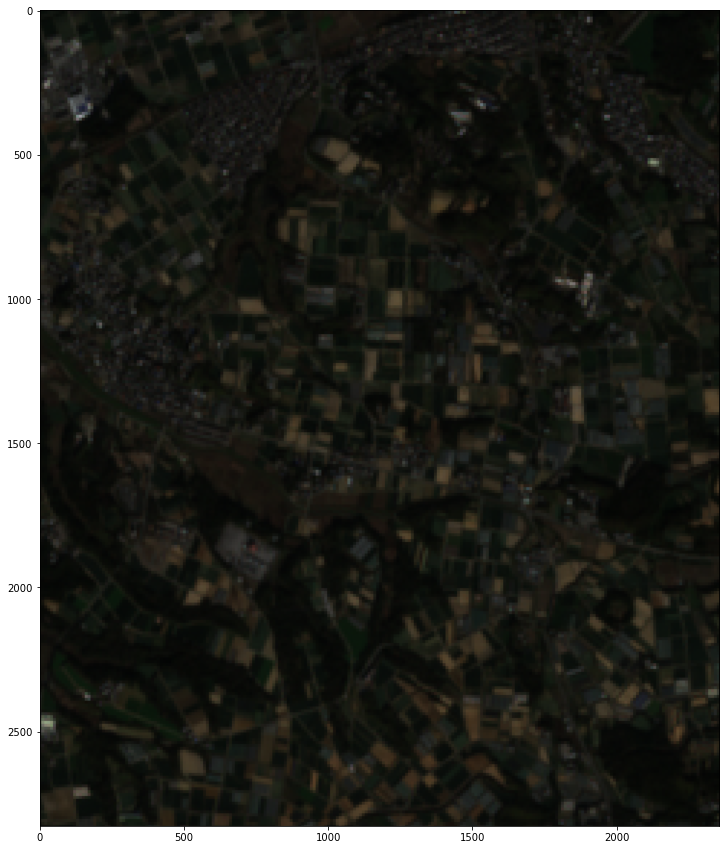

In [41]:
from osgeo import gdal
import numpy as np
ds = gdal.Open('toyohashi_export_full_scale.tif').ReadAsArray()
print(ds.shape)
# image = np.concatenate([ds[4:5], ds[3:4], ds[2:3]], 0)
image = np.transpose(ds, (1,2,0))
print(image.shape)
print(image.max())
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(image)